# DSCI100 Individual Plan


Github link: https://github.com/annixu921-creator/Dsci-100-group-project.git

### Importing Data

In [14]:
library(tidyverse)

url = "http://drive.google.com/uc?rxport-download&id=19dtTv9I4hUdTKPBrM1QgI3A0ru68ssds"
players <- read_csv(url)
dim(players); head(players)

url = "http://drive.google.com/uc?rxport-download&id=1zq0afrLG6syCD3_ezQoOP7T-GBM2XaqA"
sessions <- read_csv(url)
dim(sessions); head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 196   7

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 1535    5

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [41]:
distinct(players, experience)
distinct(players, subscribe)
distinct(players, gender)
players |> summarize(max(played_hours), min(played_hours), max(Age, na.rm = TRUE), min(Age, na.rm = TRUE))

experience
<chr>
Pro
Veteran
Amateur
Regular
Beginner


subscribe
<lgl>
TRUE
FALSE


gender
<chr>
Male
Female
Non-binary
Prefer not to say
Agender
Two-Spirited
Other


max(played_hours),min(played_hours),"max(Age, na.rm = TRUE)","min(Age, na.rm = TRUE)"
<dbl>,<dbl>,<dbl>,<dbl>
223.1,0,58,9


## 1) Data Description

The **`players`** dataset contains **196 observations and 7 variables.**  
    Variables include: 

+ **`experience`**, character, experience level of the player, categories include `Beginner`, `Regular`, `Amateur`, `Veteran`, `Pro`. 
+ **`subscribe`**, logical, whether player is subcribed to game-related newsletter, either `True` or `False`.
+ **`hashedEmail`**, character, records the hashed Email address of players.
+ **`played_hours`**, double, records the hours of video game played, records minimum of 0 (hours) and maximum 223.1 (hours). 
+ **`name`**, character, first name of the player.
+ **`gender`**, character, gender of the player, include `Male`, `Female`, `Non-Binary`, `Prefer not to say`, `Agender`, `Two-Spirited`, and `Other`. 
+ **`Age`**, double, Age of the player, records minimum of 9 (years old) and maximum of 58 (years old).

The **`sessions`** dataset contains **1535 observations and 5 variables.** 
Variables include: 

+ **`hashedEmail`**, character, records the hashed Email address of players.
+ **`start_time`**, character, year, month, day, hour, and minute of when the player started playing. 
+ **`end_time`**, character, year, month, day, hour, and minute of when the player stopped playing. 
+ **`original_start_time`**, double, records the exact minute when the player started playing counting from year 0. 
+ **`original_end_time`**, double,  records the exact minute when the player stopped playing counting from year 0. 

### Potential Issues

1. `played_hours` may not reflect true playtime, players could be on the game but afk, away from keyboard.
2. `Age` may not be accurate as people may lie about their birthday, systematic measurement error.
3. unable to decode the emails in `hashedEmail`,  the variable may not be that useful.

## 2) Questions

#### Broad Question 1: 
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

#### Specific Question: 
What a player's: `Age`, `played_hours`, `experience`, `Gender` are most predictive of subscribing to a game-related newsletter.  
In other words, how will the above predicators act when `subscribe` = `True`?

What age group, hours played, experience level, gender are most likely to subscribe to a game-related newsletter. 

## 3) Exploratory Data Analysis and Visualization

In [45]:
players <- read_csv(url)
head(players)
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


### Data Wrangling

#### Players: 
The players data set is already in tidy format and there is no further need to wrangle the data because it fits the tidy format standards. Each column in the data set is a variable: `Experience`, `Subscribe`, `hashedEmails` `name`, `gender`, and `Age`. Furthermore, each row is an observation and each cell contains one single value. 

#### Sessions: 
The sessions data set is clearly not tidy data. It contains multiple observations in one cell; year, month, day, and time of day are all recorded in one cell in `start_time`, and `end_time`. However, as stated in the intructor's note, you only need to wrangle the data sets relevant to my research question and I do not need the sessions data frame for my research question. 

### Mean of Quantitative Variables

In [44]:
players|> summarize(across(c(played_hours, Age), ~ mean(.x, na.rm = TRUE)))

played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


|**played_hours**|**Age**|
|--- | --- |
| 5.85| 21.14|

#### Exploratory Visualizations

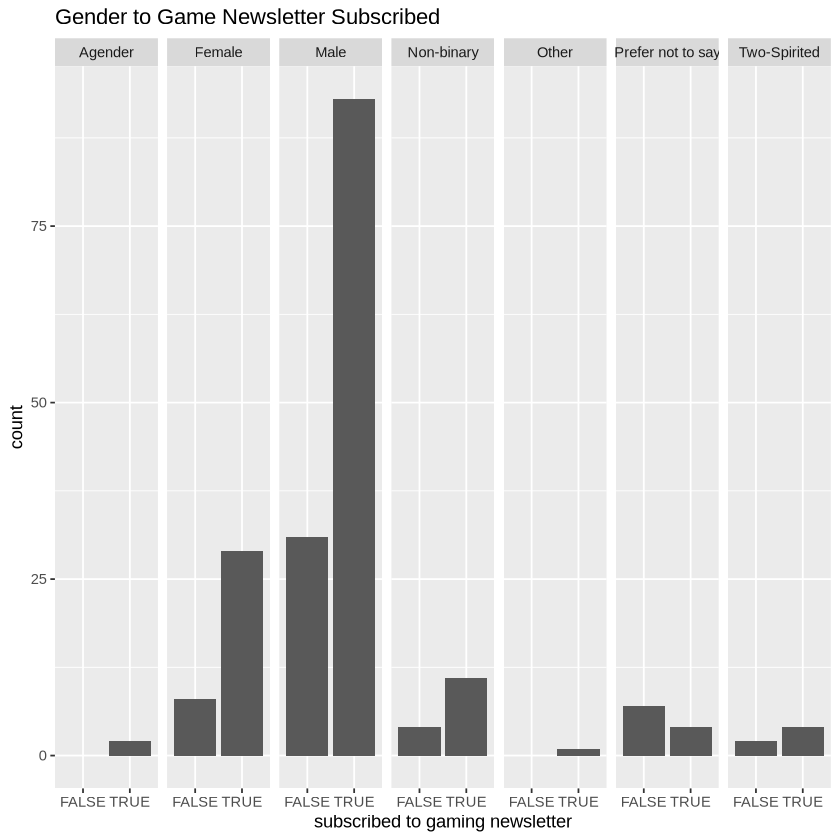

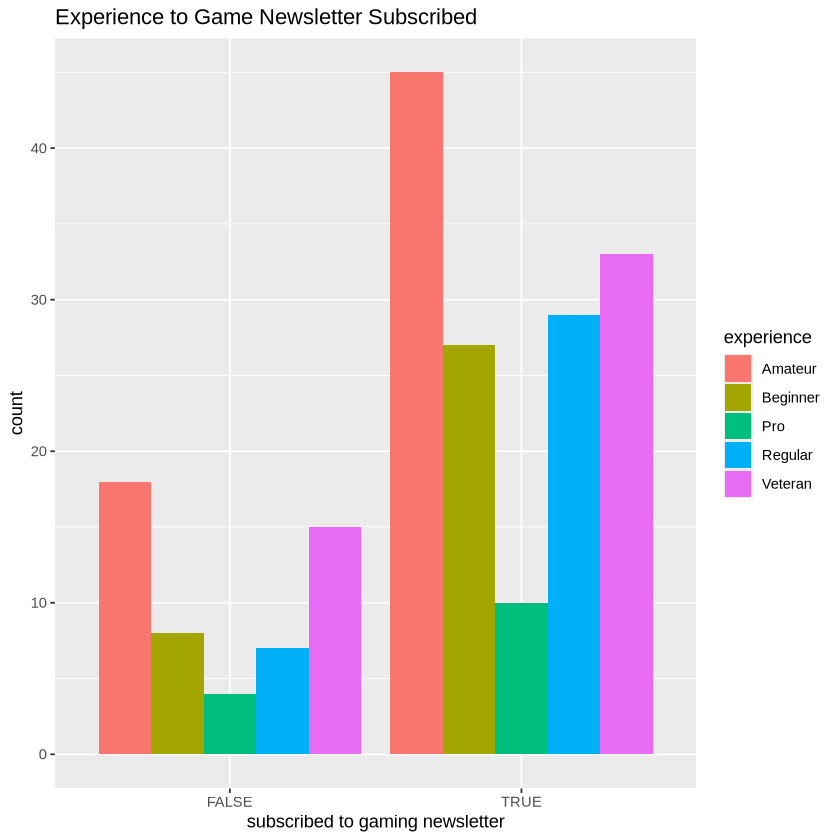

In [25]:
ggplot(players, aes(x=subscribe)) + geom_bar() + facet_grid(cols = vars(gender)) + 
    labs( title = "Gender to Game Newsletter Subscribed") +
    xlab("subscribed to gaming newsletter") 
ggplot(players, aes(x=subscribe)) + geom_bar(aes(fill=experience), position="dodge") + 
    labs( title = "Experience to Game Newsletter Subscribed") +
    xlab("subscribed to gaming newsletter") 

#### Plot Insights

Plot 1: On the `Gender` against `subscribe` plot, we can observe out of all the genders, the male category undoubtebly has the most people subscribed.

Plot 2: On the count of subscribe to `experience`, we can observe Amateurs have the highest proportion of subscribing to a newsletter out of any experience level. 

## 4) Method and Plan

For my Question, I plan to use **Knn-Classification** on my predicators, `Gender`, `Age`, `Experience`, `hours_played` to predict when `subscribe` = `True`. I chose Knn-Classification because the response variable is categorical, I would need to convert `experience` and `gender` into factors before I start. 

This plan presents certain limitations like the

I will split the data into 75% training and 25% testing sets. 
Prior to the classification, I plan to cross-validate and tune to find the best number of k for the classification. After using the best k on the training set, I will use the testing set to find my accuracy and see how I might improve my model. 